In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
import pymunk
from pymunk.vec2d import Vec2d
import pymunk.matplotlib_util

In [3]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9820
    space.damping = 0.99
    return space

In [6]:
def setup_rects(space):
    width = 600
    height = 600
    mass = 1
    points = [(-10, -10), (-10, 10), (10, 10), (10, -10)]
    moment = pymunk.moment_for_poly(mass, points)
    body = pymunk.Body(mass,moment)
    body.position = (0, 0)
    body.start_position = Vec2d(*body.position)
    shape = pymunk.Poly(body, points)
    shape.friction = 1.
    space.add(body, shape)

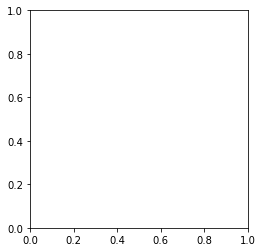

In [7]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")

space = setup_space()
setup_rects(space)

o = pymunk.matplotlib_util.DrawOptions(ax)

def init():
    space.debug_draw(o)
    return []

def animate(dt):
    for x in range(10):
        space.step(1/50/10/2)
    ax.clear()
    space.debug_draw(o)
    return []

frames = 210

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)
HTML(anim.to_html5_video())